<a href="https://colab.research.google.com/github/RazgrizGhost/Project-2/blob/main/Project_2_Part_4_JV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jerico Viloria - Red Wine Quality Dataset

The goal is to model wine quality based on physicochemical tests 

# Importing Libraries/Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

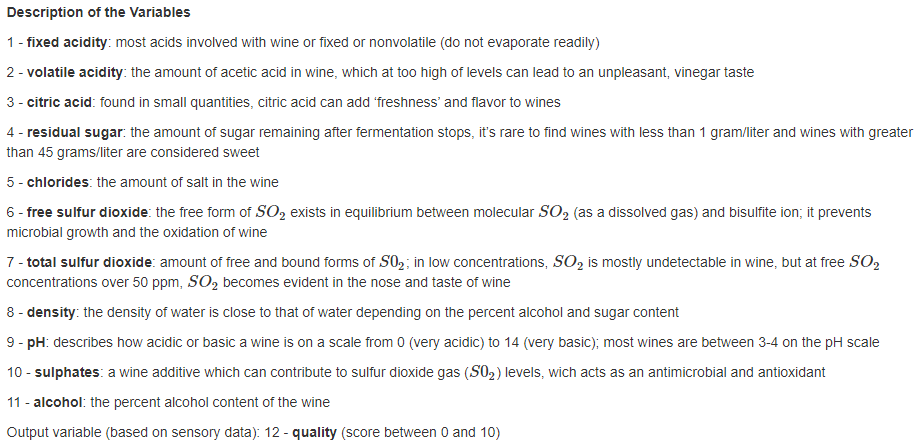

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sample_data/winequality-red.csv", sep = ";")
display(df.head())
df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Deleted unnecessary columns

There are no uncessary columns in my dataset as I need them all.

# Deleted duplicate rows

In [ ]:
df.duplicated().sum() # ".duplicated()" method to find duplicated rows

240

In [ ]:
df = df.drop_duplicates() # ".drop_duplicates" method to remove all duplicated rows
df.duplicated().sum()

0

# Identified and addressed missing values.

In [ ]:
df.isna().sum() # ".isna()" method to find missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

- My dataset does not have any categorical values.

# Produced univariate visuals for the target and all features.

## Identified outliers.

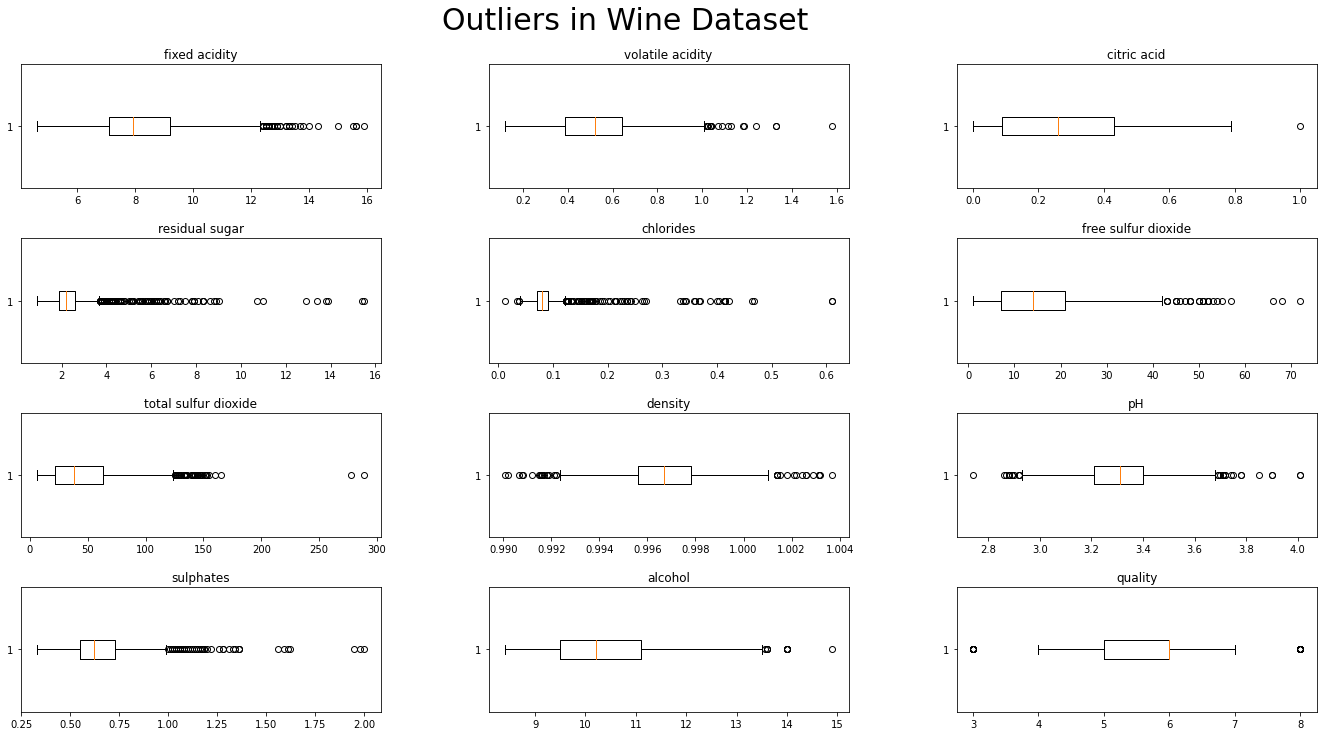

In [ ]:
fig, axs = plt.subplots(4,3, figsize = (20, 10))
fig.suptitle("Outliers in Wine Dataset", fontsize = 30)

# First Row
axs[0, 0].boxplot(df["fixed acidity"], vert = False)
axs[0, 0].set_title("fixed acidity")
axs[0, 1].boxplot(df["volatile acidity"], vert = False)
axs[0, 1].set_title("volatile acidity")
axs[0, 2].boxplot(df["citric acid"], vert = False)
axs[0, 2].set_title("citric acid")

# Second Row
axs[1,0].boxplot(df["residual sugar"], vert = False)
axs[1,0].set_title("residual sugar")
axs[1,1].boxplot(df["chlorides"], vert = False)
axs[1,1].set_title("chlorides")
axs[1,2].boxplot(df["free sulfur dioxide"], vert = False)
axs[1,2].set_title("free sulfur dioxide")

# Third Row
axs[2,0].boxplot(df["total sulfur dioxide"], vert = False)
axs[2,0].set_title("total sulfur dioxide")
axs[2,1].boxplot(df["density"], vert = False)
axs[2,1].set_title("density")
axs[2,2].boxplot(df["pH"], vert = False)
axs[2,2].set_title("pH")

# Fourth Row
axs[3,0].boxplot(df["sulphates"], vert = False)
axs[3,0].set_title("sulphates")
axs[3,1].boxplot(df["alcohol"], vert = False)
axs[3,1].set_title("alcohol")
axs[3,2].boxplot(df["quality"], vert = False)
axs[3,2].set_title("quality")

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.00, top=0.9,
                    hspace=0.4, wspace=0.3)

# Project 2 - Part 3 

1. For this part of the project, you will continue your data exploration by:
  - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
  - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).
  - These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions.  They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

## Identifying any moderate or strong correlations. 

### Correlations with heatmap

<AxesSubplot:title={'center':'Heatmap Map between all Wine Variables'}>

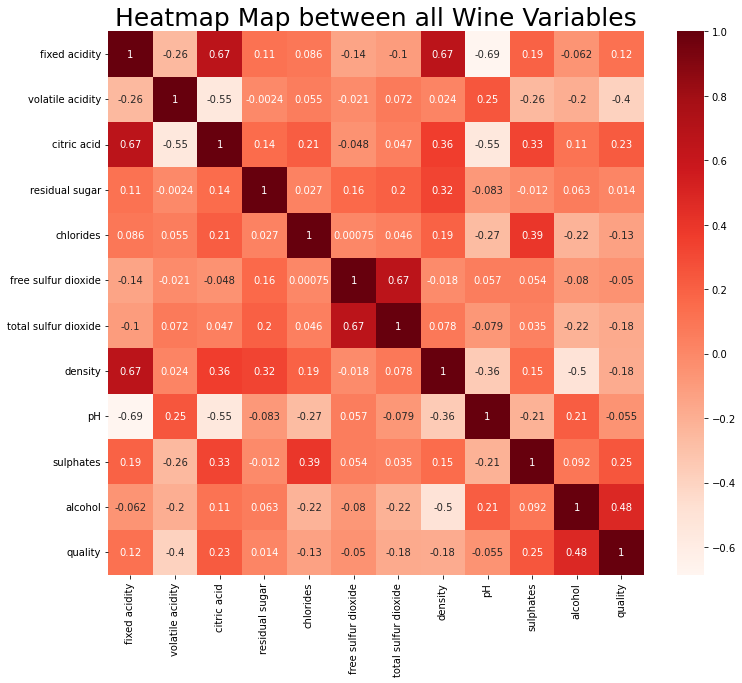

In [ ]:
# put a title 
correlation = df.corr()

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title("Heatmap Map between all Wine Variables", fontsize = 25)
sns.heatmap(correlation, cmap = "Reds", annot = True)

This is a heatmap plot that shows the correlation between all the variable within the dataset. Darker the color the closer correlation between  two variables. Also higher the number the closer the correlation. 

### Correlations with scatterplots

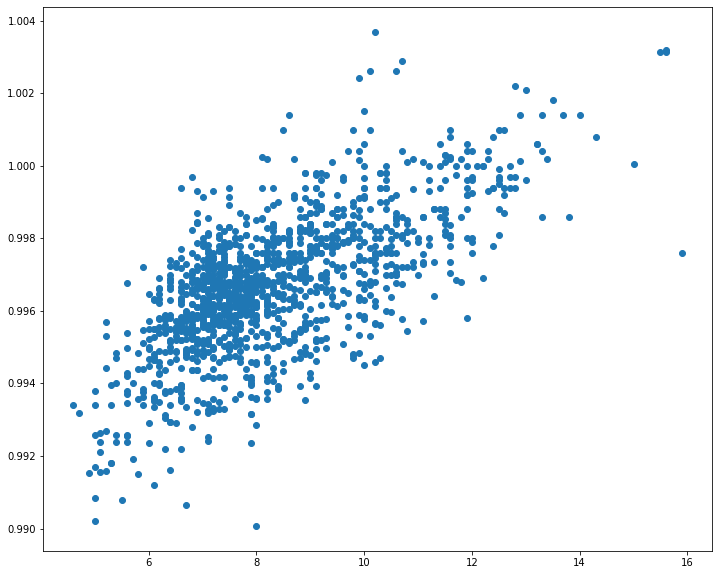

In [ ]:
# add title and brief description
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df["fixed acidity"], df["density"])
ax.set_xlabel("Fixed Acidity")
ax.set_ylabel("Density")
ax.set_title("Density and Fixed Acidity")

A scatterplot between Acidity in Red Wine and Density of water

Text(0.5, 1.0, 'Fixed Acidity and Citric Acid')

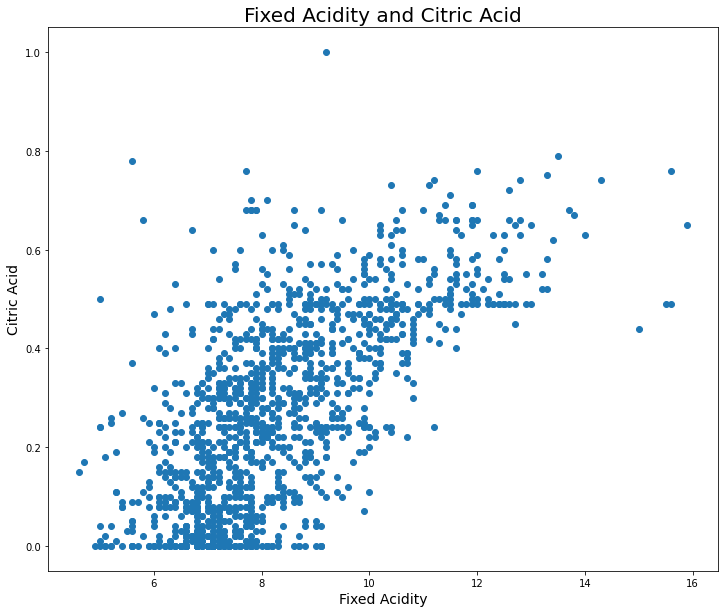

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df["fixed acidity"], df["citric acid"])
ax.set_xlabel("Fixed Acidity", fontsize = 14)
ax.set_ylabel("Citric Acid", fontsize = 14)
ax.set_title("Fixed Acidity and Citric Acid", fontsize = 20)

A scatterplot between Acidity in Red Wine and the added freshness of Citric Acid

Text(0.5, 1.0, 'Free Sulur Dioxide and Total Sulfur Dioxide')

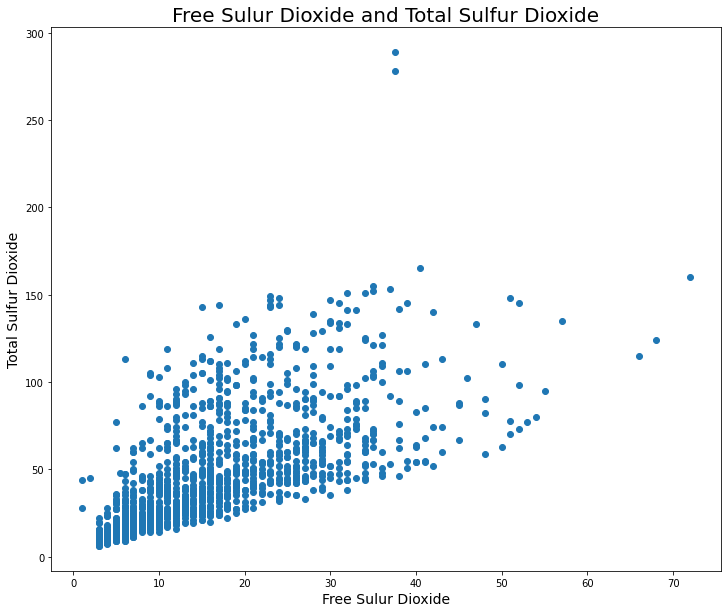

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df["free sulfur dioxide"], df["total sulfur dioxide"])
ax.set_xlabel("Free Sulur Dioxide", fontsize = 14)
ax.set_ylabel("Total Sulfur Dioxide", fontsize = 14)
ax.set_title("Free Sulur Dioxide and Total Sulfur Dioxide", fontsize = 20)

A scatterplot betwen Free Sulfur Dioxide and Total Sulfur Dioxide

Text(0.5, 1.0, 'Quality and Alcohol')

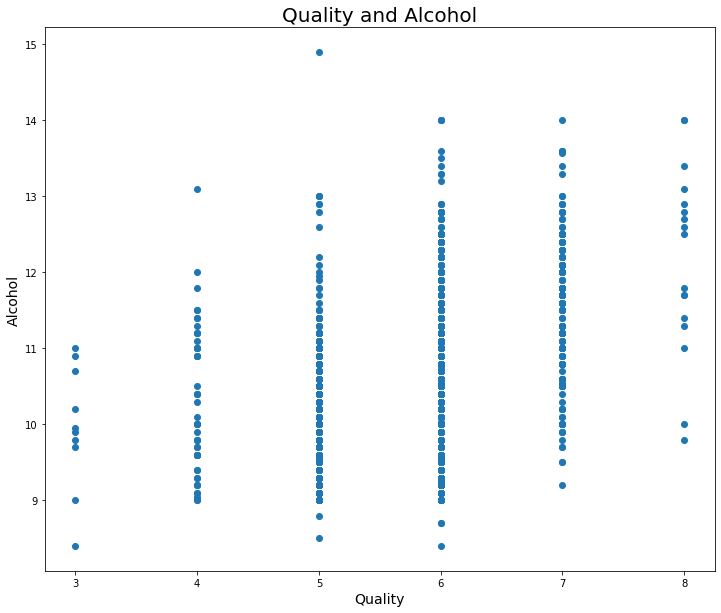

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df["quality"], df["alcohol"])
ax.set_xlabel("Quality", fontsize = 14)
ax.set_ylabel("Alcohol", fontsize = 14)
ax.set_title("Quality and Alcohol", fontsize = 20)

A scatterplot of the correlation between Wine Quality and Alcohol Content

## Chosen visualizations

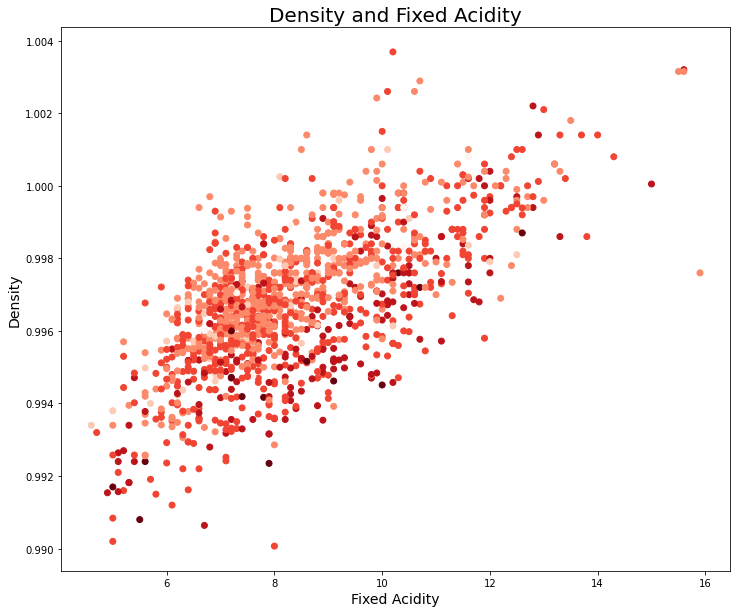

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df["fixed acidity"], df["density"], c = df["quality"], cmap = "Reds")
ax.set_xlabel("Fixed Acidity", fontsize = 14)
ax.set_ylabel("Density", fontsize = 14)
ax.set_title("Density and Fixed Acidity", fontsize = 20);

In this scatterplot visualization, shows a **positive** correlation between fixed acidity and density. This is important because there are acids found in wine as it helps with the sweetness or sourness. The more acidic the wine is the more **dense** it becomes relative to water. 

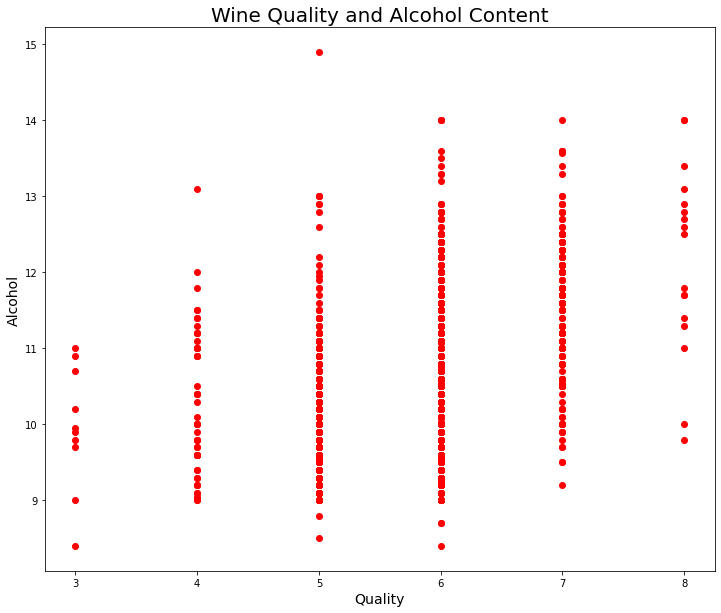

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(df["quality"], df["alcohol"], c = "red")
ax.set_xlabel("Quality", fontsize = 14)
ax.set_ylabel("Alcohol", fontsize = 14)
ax.set_title("Wine Quality and Alcohol Content", fontsize = 20);

In this scatterplot visualization, shows a correlation in Wine Quality and Percent Alcohol Content. Wine quality is specifically important, and paired with Alcohol the better the quality

# Project 2 - Part 4

## Ensure that you complete the appropriate pre-processing steps.

In [ ]:
# Assigning Target (y) and Features (X)
y = df["quality"]
X = df.drop(columns = "quality")

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Fit and evaluate multiple types of models on your data.

### Linear Regression Model

In [ ]:
# Standard Scaler for numerical
scaler = StandardScaler()

# Instantiate Linear Regression Model
linreg = LinearRegression()

# Making pipeline
linreg_pipe = make_pipeline(scaler, linreg)

# Fit the data
linreg_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
# Model Predictions
linregtrain_pred = linreg_pipe.predict(X_train)
linregtest_pred = linreg_pipe.predict(X_test)

In [ ]:
# Mean Squared Error
linregtrain_MSE = np.mean(np.abs(linregtrain_pred - y_train) ** 2)
linregtest_MSE = np.mean(np.abs(linregtest_pred - y_test) ** 2)

print(linregtrain_MSE)
print(linregtest_MSE)

0.44261345619580844
0.4066700352371035


In [ ]:
# Root Mean Squared Error
linreg_XtrainRMSE = np.sqrt(linregtrain_MSE)
linreg_XtestRMSE = np.sqrt(linregtest_MSE)

print(linreg_XtrainRMSE)
print(linreg_XtestRMSE)

0.6652920082157973
0.637706856821458


In [ ]:
# R Squared Score
linregtrain_r2 = r2_score(y_train, linregtrain_pred)
linregtest_r2 = r2_score(y_test, linregtest_pred)

print(linregtrain_r2)
print(linregtest_r2)

0.3472864927741115
0.3983046924599818


### Bagging Regressor Model

In [ ]:
# scaler = StandardScaler()

# Instantiate Linear Regression Model
bagreg = BaggingRegressor(random_state = 42)

# Making pipeline
bagreg_pipe = make_pipeline(scaler, bagreg)

# Fit the data
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [ ]:
# Model Predictions
bagregtrain_pred = bagreg_pipe.predict(X_train)
bagregtest_pred = bagreg_pipe.predict(X_test)

In [ ]:
# Mean Squared Error
bagregtrain_MSE = np.mean(np.abs(bagregtrain_pred - y_train) ** 2)
bagregtest_MSE = np.mean(np.abs(bagregtest_pred - y_test) ** 2)

print(bagregtrain_MSE)
print(bagregtest_MSE)

0.08212953876349363
0.3936470588235294


In [ ]:
# Root Mean Squared Error
bagreg_XtrainRMSE = np.sqrt(bagregtrain_MSE)
bagreg_XtestRMSE = np.sqrt(bagregtest_MSE)

print(bagreg_XtrainRMSE)
print(bagreg_XtestRMSE)

0.2865825165000364
0.6274129890459149


In [ ]:
# R Squared Score
bagregtrain_r2 = r2_score(y_train, bagregtrain_pred)
bagregtest_r2 = r2_score(y_test, bagregtest_pred)

print(bagregtrain_r2)
print(bagregtest_r2)

0.8788851569179379
0.41757305038973014


### Random Forest Model

In [ ]:
# scaler = StandardScaler()

# Instantiate Linear Regression Model
ranfor = RandomForestRegressor(random_state = 42)

# Making pipeline
ranfor_pipe = make_pipeline(scaler, ranfor)

# Fit the data
ranfor_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Model Predictions
ranfortrain_pred = ranfor_pipe.predict(X_train)
ranfortest_pred = ranfor_pipe.predict(X_test)

In [ ]:
# Mean Squared Error
ranfortrain_MSE = np.mean(np.abs(ranfortrain_pred - y_train) ** 2)
ranfortest_MSE = np.mean(np.abs(ranfortest_pred - y_test) ** 2)

print(ranfortrain_MSE)
print(ranfortest_MSE)

0.05936771344455348
0.37209647058823525


In [ ]:
# Root Mean Squared Error
ranfor_XtrainRMSE = np.sqrt(ranfortrain_MSE)
ranfor_XtestRMSE = np.sqrt(ranfortest_MSE)

print(ranfor_XtrainRMSE)
print(ranfor_XtestRMSE)

0.24365490646517562
0.6099971070326771


In [ ]:
# R Squared Score 
ranfortrain_r2 = r2_score(y_train, ranfortrain_pred)
ranfortest_r2 = r2_score(y_test, ranfortest_pred)

print(ranfortrain_r2)
print(ranfortest_r2)

0.9124515806830027
0.44945857598136474


### GridSearchCV

In [ ]:
## LINEAR REGRESSION CANNOT BE TUNED ##

In [ ]:
# Getting tuning parameters

bagreg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Getting tuning parameters

ranfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Instantiate Bagging Regressor Model and making a parameter dictionary
bagreg_param_grid = {"max_features": [1, 5, 10], "n_estimators": [2, 5, 10], "n_jobs": [2, 10, 100]}

bagreg_grid_search = GridSearchCV(bagreg, bagreg_param_grid)

bagreg_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42),
             param_grid={'max_features': [1, 5, 10], 'n_estimators': [2, 5, 10],
                         'n_jobs': [2, 10, 100]})

In [ ]:
# Instantiate Random Forest Model and making a parameter dictionary
ranfor_param_grid = {"max_depth": [1, 5, 10], "min_samples_leaf": [5, 15, 25], "n_estimators": [2, 20, 100]}

ranfor_grid_search = GridSearchCV(ranfor, ranfor_param_grid)

ranfor_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 5, 10],
                         'min_samples_leaf': [5, 15, 25],
                         'n_estimators': [2, 20, 100]})

In [ ]:
# Showing the best parameters
print(f"Bagging Regresor Best Parameters: {bagreg_grid_search.best_params_}")
print(f"Random Forest Best Parameters: {ranfor_grid_search.best_params_}")

Bagging Regresor Best Parameters: {'max_features': 10, 'n_estimators': 10, 'n_jobs': 2}
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}


In [ ]:
# Zeroing in on best tuned values
bagreg_param_grid2 = {"max_features": [5, 7, 10], "n_estimators": [5, 7, 10], "n_jobs": [2, 5, 7]}
bagreg_grid_search2 = GridSearchCV(bagreg, bagreg_param_grid2)
bagreg_grid_search2.fit(X_train, y_train)
bagreg_grid_search2.best_params_

{'max_features': 7, 'n_estimators': 10, 'n_jobs': 2}

In [ ]:
# Zeroing in on best tuned values
ranfor_param_grid2 = {"max_depth": [5, 7, 10], "min_samples_leaf": [2, 5, 7], "n_estimators": [60, 80, 100]}
ranfor_grid_search2 = GridSearchCV(ranfor, ranfor_param_grid2)
ranfor_grid_search2.fit(X_train, y_train)
ranfor_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 7, 'n_estimators': 100}

In [ ]:
# Getting the best model
bagreg_best_model = bagreg_grid_search2.best_estimator_

bagreg_best_model.fit(X_train, y_train)

bagreg_best_model.score(X_test, y_test)

0.40364771985511516

In [ ]:
# Getting the best model
ranfor_best_model = ranfor_grid_search2.best_estimator_

ranfor_best_model.fit(X_train, y_train)

ranfor_best_model.score(X_test, y_test)

0.45232625764099144

## Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. 

In [ ]:
# scaler = StandardScaler()

# Fitting and Transform Data
scaled_df = scaler.fit_transform(X)

In [ ]:
# Instantiate, Fitting and Transform Data using PCA
pca = PCA()
pcs = pca.fit_transform(scaled_df)

In [ ]:
# Creating a Transformer pipeline
transformer = make_pipeline(scaler, pca)

In [ ]:
%%time
# I will be using the previous Linear Regression, Bagging Regressor, Random Forest Models.

# PCA with Linear Regression
pcalinreg_pipe = make_pipeline(transformer, linreg)
pcalinreg_pipe.fit(X_train, y_train)

print("Linear Regression Training Score:", pcalinreg_pipe.score(X_train, y_train))
print("Linear Regression Testing Score:", pcalinreg_pipe.score(X_test, y_test))

Linear Regression Training Score: 0.3472864927741116
Linear Regression Testing Score: 0.39830469245998157
CPU times: user 23.6 ms, sys: 27.1 ms, total: 50.7 ms
Wall time: 46.2 ms


In [ ]:
%%time
# PCA with Bagging Regressor
pcabagreg_pipe = make_pipeline(transformer, bagreg_best_model)
pcabagreg_pipe.fit(X_train, y_train)

print("Bagging Regressor Training Score:", pcabagreg_pipe.score(X_train, y_train))
print("Bagging Regressor Testing Score:", pcabagreg_pipe.score(X_test, y_test))

Bagging Regressor Training Score: 0.8621701797689618
Bagging Regressor Testing Score: 0.3042991898222217
CPU times: user 52.2 ms, sys: 101 ms, total: 153 ms
Wall time: 215 ms


In [ ]:
%%time
# PCA with Random Forest
pcaranfor_pipe = make_pipeline(transformer, ranfor_best_model)
pcaranfor_pipe.fit(X_train, y_train)

print("Linear Regression Training Score:", pcaranfor_pipe.score(X_train, y_train))
print("Linear Regression Testing Score:", pcaranfor_pipe.score(X_test, y_test))

Linear Regression Training Score: 0.6562106291630903
Linear Regression Testing Score: 0.4258805018839068
CPU times: user 993 ms, sys: 56 ms, total: 1.05 s
Wall time: 1.06 s


## Choose your "production" model and justify this decision using the metrics most important to your business problem.

- The model I will have to choose would be the Random Forest Best Params Model as it has the top test score out of all of the Models. 